/opt/conda/envs/neuro/lib/python3.6/site-packages/ipykernel_launcher.py:37: DeprecationWarning: 'U' mode is deprecated
/opt/conda/envs/neuro/lib/python3.6/site-packages/ipykernel_launcher.py:59: DeprecationWarning: 'U' mode is deprecated


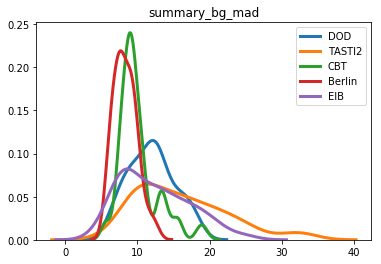

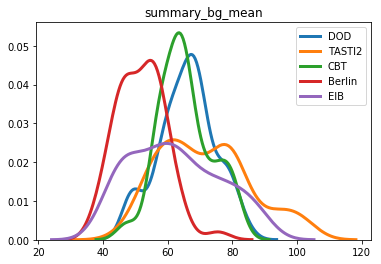

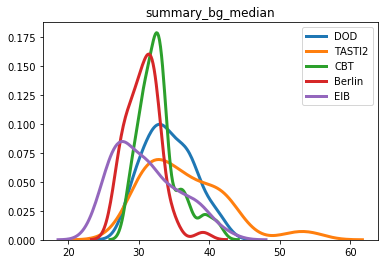

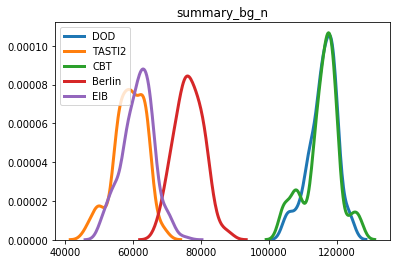

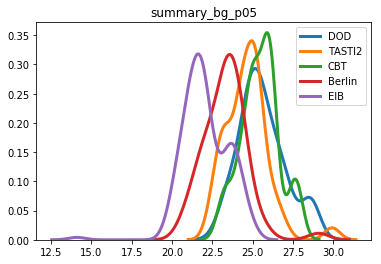

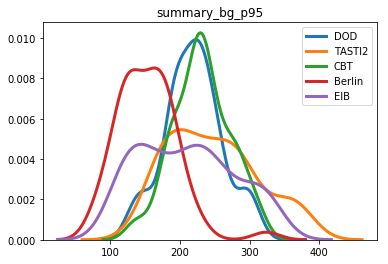

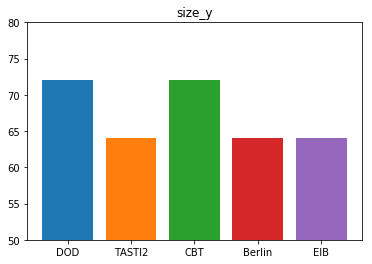

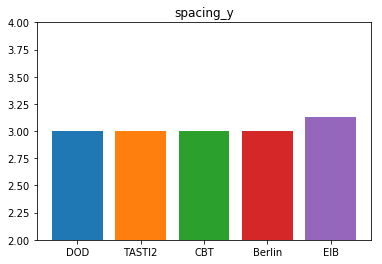

In [162]:
# modules
from glob import glob
import re
import os.path
from itertools import repeat
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pp
from statistics import mean

# directory
root = '/om/group/saxelab/OpenAutism/data/'
save_root = '/om/user/rezzo/Site_Variance_Plots/mriqc/'

# list sites
all_sites_dir = os.listdir(root)

# look at the following metrics that are related to acquisition site:
categories = ['summary_bg_mad','summary_bg_mean', 'summary_bg_median','summary_bg_n',
             'summary_bg_p05','summary_bg_p95']

fixed_categories = ['size_y','spacing_y']

file='bold.csv'

for element in categories:
    title = []
    data = []
    dataframes = []
    
    for site in all_sites_dir: 
        mriqc_root = root+site+'/mriqc_output/'
        if os.path.isdir(mriqc_root):
            tt = pd.read_csv(open(mriqc_root+file,'rU'), encoding='utf-8', engine='c')
            templist = tt[element].tolist()
            data.append(templist)
            title.append(site)
            
    plt.figure()
    for i in range(0,len(data)):           
        sns.distplot(data[i], hist = False, kde = True,
                      kde_kws = {'shade': False, 'linewidth': 3}, 
                      label = title[i]).set_title(element)

    plt.savefig(save_root+element)
    

for element in fixed_categories:
    title = []
    data = []
    value = []
    plt.figure()
    for site in all_sites_dir: 
        mriqc_root = root+site+'/mriqc_output/'
        if os.path.isdir(mriqc_root):
            tt = pd.read_csv(open(mriqc_root+file,'rU'), encoding='utf-8', engine='c')
            #templist = tt[element].value_counts().tolist()
            #data.append(templist)
            value.append(mean(tt[element].value_counts().keys().tolist()))
            title.append(site)
            
    #new_vals = [item for sublist in value for item in sublist]
    new_vals = value
    
    plt.figure()
    for ee in range(0, len(title)):
        barlist=pp.bar(title[ee], new_vals[ee])
    if element == 'size_y':
        pp.ylim((50, 80)) 
    elif element == 'spacing_y':
        pp.ylim((2,4))
    pp.title(element)
    pp.show
    plt.savefig(save_root+element)
 

/opt/conda/envs/neuro/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: 'U' mode is deprecated
  from ipykernel import kernelapp as app


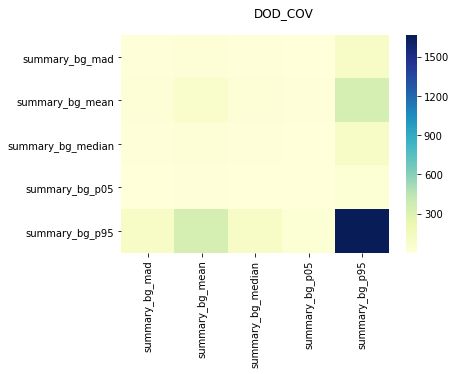

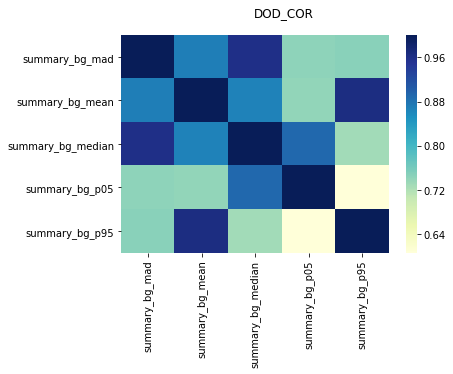

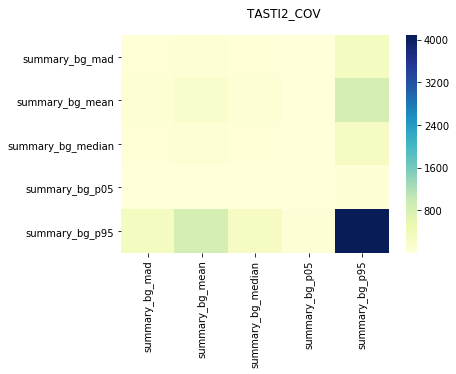

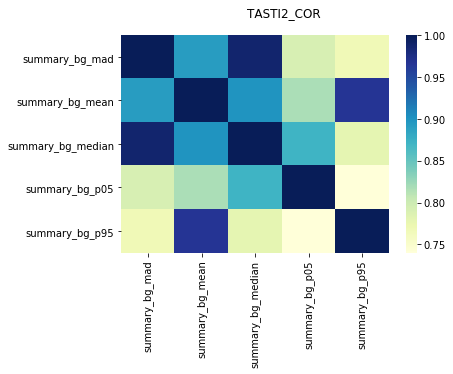

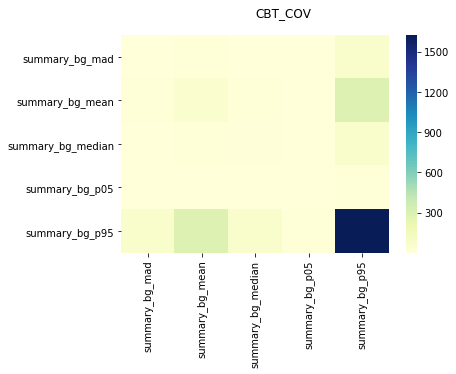

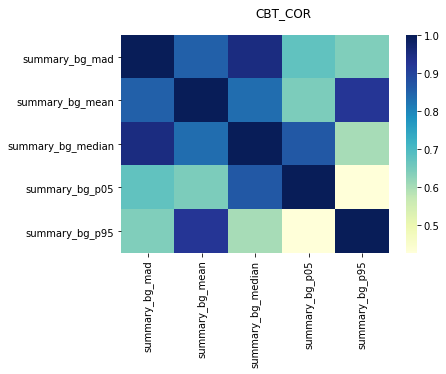

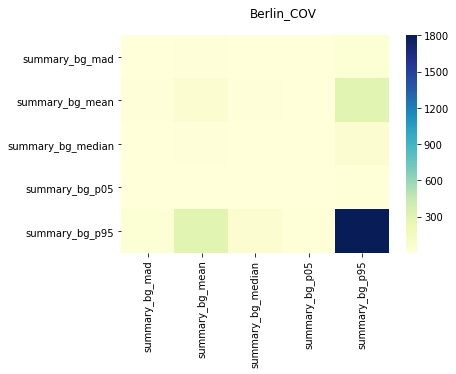

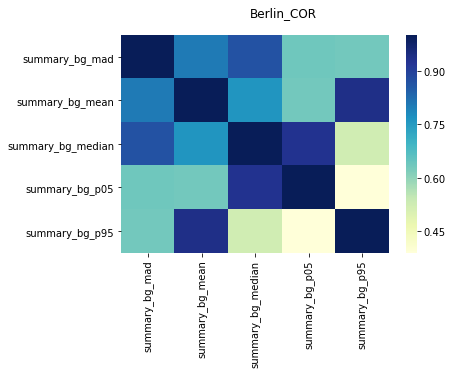

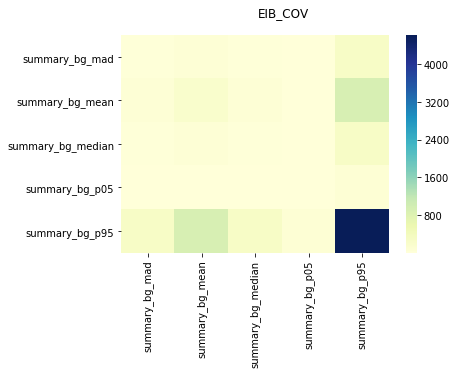

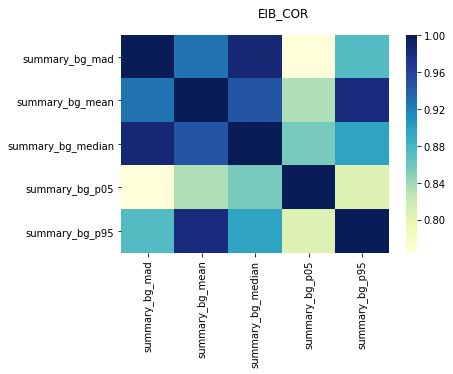

In [161]:
# directory
root = '/om/group/saxelab/OpenAutism/data/'

# list sites
all_sites_dir = os.listdir(root)
count = 0
totalsites = 0

for site in all_sites_dir:
    mriqc_root = root+site+'/mriqc_output/'
    if os.path.isdir(mriqc_root):

        #load the dataframe
        tt = pd.read_csv(open('/om/group/saxelab/OpenAutism/data/'+site+'/mriqc_output/bold.csv','rU'), encoding='utf-8', engine='c')

        # copy the dataframe
        copy = tt[['summary_bg_mad','summary_bg_mean', 'summary_bg_median',
                     'summary_bg_p05','summary_bg_p95']] # excluding  'summary_bg_n'

        cov_df = copy.cov()
        corr_df = copy.corr()

        ## correlation & covariance

        cov_df = copy.cov()
        corr_df = copy.corr()
        
        plt.figure()
        fg1 = sns.heatmap(cov_df, cmap="YlGnBu")
        figure = fg1.get_figure()    
        figure.suptitle(site+'_COV', fontsize=12)
        figure.savefig(save_root+site+'_COV',bbox_inches='tight')

        plt.figure()
        fg2 = sns.heatmap(corr_df, cmap="YlGnBu")
        figure = fg2.get_figure()    
        figure.suptitle(site+'_COR', fontsize=12)
        figure.savefig(save_root+site+'_COR',bbox_inches='tight')



['ff']

In [113]:
tt1 = pd.read_csv(open('/om/group/saxelab/OpenAutism/data/EIB/mriqc_output/bold.csv','rU'), encoding='utf-8', engine='c')
tt2 = pd.read_csv(open('/om/group/saxelab/OpenAutism/data/TASTI2/mriqc_output/bold.csv','rU'), encoding='utf-8', engine='c')
tt3 = pd.read_csv(open('/om/group/saxelab/OpenAutism/data/Berlin/mriqc_output/bold.csv','rU'), encoding='utf-8', engine='c')
tt4 = pd.read_csv(open('/om/group/saxelab/OpenAutism/data/CBT/mriqc_output/bold.csv','rU'), encoding='utf-8', engine='c')
tt5 = pd.read_csv(open('/om/group/saxelab/OpenAutism/data/DOD/mriqc_output/bold.csv','rU'), encoding='utf-8', engine='c')
result = pd.concat([tt1, tt2, tt3, tt4, tt5], axis=1)

copy = tt5[['summary_bg_mad','summary_bg_mean', 'summary_bg_median',
             'summary_bg_p05','summary_bg_p95']] #, 'summary_bg_n']]
# excluding  'summary_bg_n'
cov_df = copy.cov()
corr_df = copy.corr()


/opt/conda/envs/neuro/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 'U' mode is deprecated
  """Entry point for launching an IPython kernel.
/opt/conda/envs/neuro/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 'U' mode is deprecated
  
/opt/conda/envs/neuro/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 'U' mode is deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/envs/neuro/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 'U' mode is deprecated
  after removing the cwd from sys.path.
/opt/conda/envs/neuro/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 'U' mode is deprecated
  """


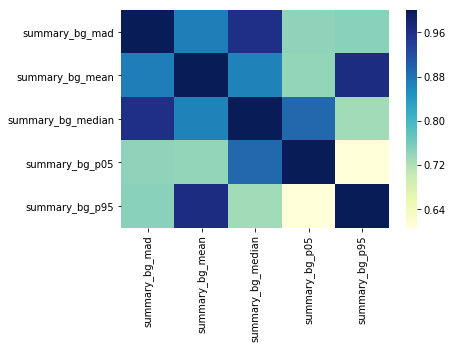

In [115]:
#copy
cov_df
sns.heatmap(cov_df, cmap="YlGnBu")
sns.heatmap(corr_df, cmap="YlGnBu")

In [112]:
copy

,summary_bg_mad,summary_bg_mean,summary_bg_median,summary_bg_p05,summary_bg_p95,summary_bg_n
0,13.847313,69.103271,36.490196,26.607843,228.566673,119463.0
1,14.428725,70.210442,37.052288,26.764706,233.316345,119443.0
2,14.796571,70.564606,37.324505,26.675497,234.788086,119141.0
3,14.554697,70.718987,37.196079,26.712420,234.501968,119315.0
4,16.531502,75.217743,37.444447,25.738562,260.526807,114655.0
5,14.845405,71.008408,35.647060,24.522877,247.364056,115059.0
6,17.587736,74.453880,38.535950,25.895426,257.349664,114843.0
7,16.134201,74.829979,37.490196,25.993464,260.777771,114921.0
8,15.901633,77.573181,39.915031,28.496733,258.960785,112261.0
9,15.171967,76.571068,39.440002,28.573334,257.565678,112484.0


In [60]:
corr_df = copy.corr()
corr_df

,summary_bg_mad,summary_bg_mean,summary_bg_median,summary_bg_n,summary_bg_p05,summary_bg_p95
summary_bg_mad,1.000000,0.929814,0.985984,-0.650477,0.764229,0.874471
summary_bg_mean,0.929814,1.000000,0.947412,-0.685100,0.833356,0.981636
summary_bg_median,0.985984,0.947412,1.000000,-0.682925,0.856193,0.897611
summary_bg_n,-0.650477,-0.685100,-0.682925,1.000000,-0.664762,-0.646146
summary_bg_p05,0.764229,0.833356,0.856193,-0.664762,1.000000,0.806654
summary_bg_p95,0.874471,0.981636,0.897611,-0.646146,0.806654,1.000000


/opt/conda/envs/neuro/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 'U' mode is deprecated
  """Entry point for launching an IPython kernel.
/opt/conda/envs/neuro/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 'U' mode is deprecated
  
/opt/conda/envs/neuro/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 'U' mode is deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/envs/neuro/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 'U' mode is deprecated
  after removing the cwd from sys.path.
/opt/conda/envs/neuro/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 'U' mode is deprecated
  """


In [81]:
result

,subject_id,task_id,run_id,aor,aqi,dummy_trs,dvars_nstd,dvars_std,dvars_vstd,efc,...,summary_bg_stdv,summary_fg_k,summary_fg_mad,summary_fg_mean,summary_fg_median,summary_fg_n,summary_fg_p05,summary_fg_p95,summary_fg_stdv,tsnr
0,SAXEIB01,tomloc,1,0.002862,0.002859,1,21.227670,1.170567,1.022168,0.588686,...,87.115456,0.465225,187.186798,590.951111,565.599976,36112.0,280.589995,966.650345,207.378769,82.330154
1,SAXEIB01,tomloc,2,0.003763,0.003053,0,22.221814,1.177353,1.027988,0.589014,...,88.434395,0.500307,186.535370,589.353027,563.761047,36118.0,278.392651,965.096689,207.255035,76.007256
2,SAXEIB02,tomloc,1,0.004221,0.002636,0,23.296824,1.148898,1.012454,0.614293,...,71.577530,0.980099,169.719818,557.825623,527.573486,39400.0,307.020593,911.244144,189.186996,71.933060
3,SAXEIB04,dyloc,1,0.001211,0.001773,0,23.946178,1.229633,1.016496,0.589206,...,61.069809,1.736752,177.724503,588.297241,554.960022,36996.0,311.104996,980.863373,209.367737,82.789688
4,SAXEIB04,dyloc,2,0.001111,0.001664,0,23.715917,1.224160,1.014714,0.589501,...,61.821228,1.782141,177.002930,589.527100,555.926697,36825.0,314.281348,981.340027,208.792343,83.692307
5,SAXEIB04,tomloc,1,0.002900,0.002558,0,26.642861,1.198489,0.999015,0.590506,...,63.039406,1.560667,174.903442,592.170349,560.242676,36673.0,321.929407,974.429407,203.359375,71.326767
6,SAXEIB04,tomloc,2,0.003934,0.003281,2,27.779706,1.187410,1.006681,0.592140,...,64.257347,1.515956,173.829590,589.520874,558.000000,36837.0,319.614911,970.679089,203.120224,63.744701
7,SAXEIB06,dyloc,1,0.033844,0.014931,0,48.544934,1.063117,1.168293,0.591154,...,81.863342,3.428587,213.000519,630.972717,578.436646,37208.0,297.785010,1154.692694,271.550781,22.413794
8,SAXEIB06,dyloc,2,0.078843,0.014662,0,46.170725,1.517665,1.417233,0.597269,...,84.699821,3.286244,210.618469,616.677673,565.346680,37747.0,293.092667,1125.240698,263.625977,20.996059
9,SAXEIB06,tomloc,1,0.022874,0.013503,0,52.114324,1.241928,1.070831,0.590901,...,82.157364,3.222663,220.744263,639.916931,586.102966,36873.0,298.392645,1177.175000,278.939972,27.846714
